In [1]:
import pandas as pd

In [2]:
mta1706 = pd.read_csv("new-york-city-transport-statistics/mta_1706_new.csv")

In [3]:
mta1706.rename(index=str, inplace=True,
               columns={"VehicleLocation.Latitude": "vehicle_latitude",
                                   "VehicleLocation.Longitude": "vehicle_longitude"})
mta1706.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'vehicle_latitude',
       'vehicle_longitude', 'NextStopPointName', 'ArrivalProximityText',
       'DistanceFromStop', 'ExpectedArrivalTime', 'ScheduledArrivalTime'],
      dtype='object')

In [4]:
mta1706['RecordedAtTime'] = pd.to_datetime(mta1706['RecordedAtTime'])
mta1706.RecordedAtTime.describe()

count                 6730856
unique                 218289
top       2017-06-16 07:58:54
freq                      143
first     2017-06-01 00:01:18
last      2017-06-30 23:53:38
Name: RecordedAtTime, dtype: object

In [5]:
mta1706['DirectionRef'] = mta1706['DirectionRef'].astype('category')
mta1706.DirectionRef.describe()

count     6730856
unique          2
top             1
freq      3384160
Name: DirectionRef, dtype: int64

In [6]:
mta1706['PublishedLineName'] = mta1706['PublishedLineName'].astype('category')
mta1706.PublishedLineName.describe()

count     6730856
unique        326
top            B6
freq       124896
Name: PublishedLineName, dtype: object

In [14]:
mta1706['VehicleRef'].describe()

count       6730856
unique         5719
top       NYCT_5860
freq           2978
Name: VehicleRef, dtype: object

In [45]:
bus_stops = mta1706.loc[mta1706['DistanceFromStop']==0][["vehicle_latitude", "vehicle_longitude", "NextStopPointName"]]

In [46]:
bus_stops.drop_duplicates(inplace=True)

In [54]:
bus_stops.sort_values(by=['NextStopPointName', 'vehicle_latitude', 'vehicle_longitude'], inplace=True)
bus_stops = bus_stops.groupby(['NextStopPointName'])['vehicle_latitude', 'vehicle_longitude'].mean()

In [42]:
mta1706.DestinationName.describe()

count                      6730856
unique                         778
top       WASHINGTON HTS GW BRIDGE
freq                         91894
Name: DestinationName, dtype: object

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [9]:
lat = mta1706['vehicle_latitude'].values
lon = mta1706['vehicle_longitude'].values

In [10]:
import re
routes = mta1706.PublishedLineName.values
bur_routes = list()
for r in routes:
    bur_routes.append(re.split('(\d+)',r)[0])

In [11]:
mta1706['bur_routes'] = bur_routes
mta1706['bur_routes'] = mta1706['bur_routes'].astype('category')
routes = mta1706.bur_routes.values.codes

In [12]:
categories =dict( enumerate(mta1706['bur_routes'].cat.categories) )
categories.values()
route_names = np.fromiter(categories.values(), dtype="<U10")

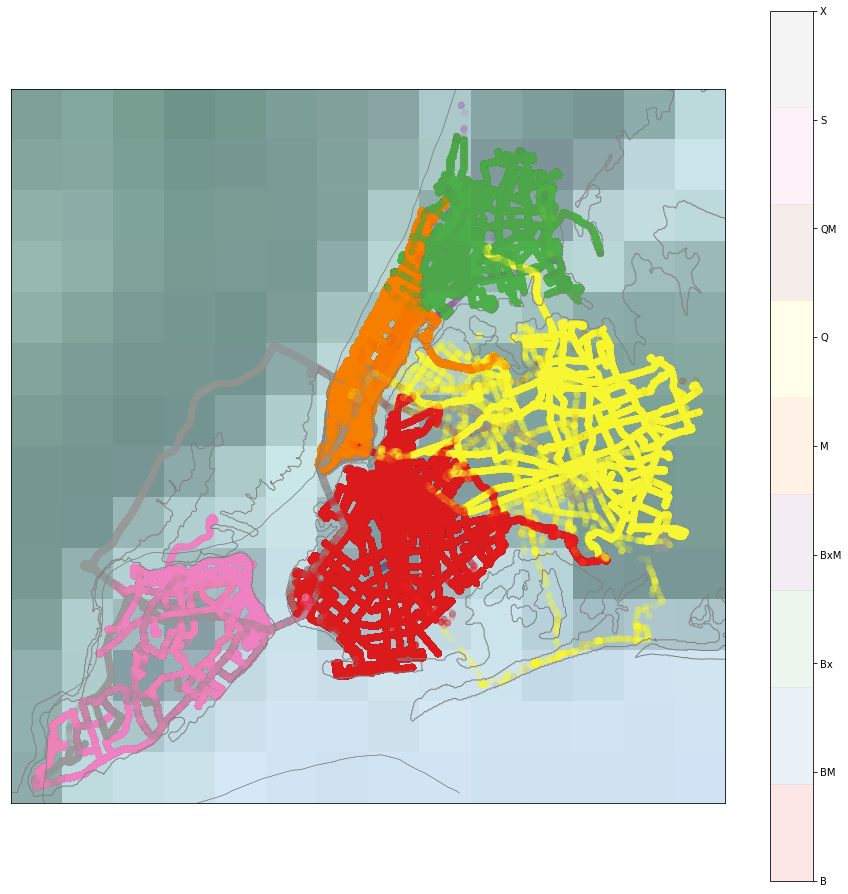

In [13]:
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=40.717768, lon_0=-73.9768765,
            width=5E4, height=5E4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# 2. scatter city data,
m.scatter(lon, lat, latlon=True,c=routes,cmap='Set1', alpha=0.5)

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: route_names[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], format=formatter)

# Set the clim so that labels are centered on each block
# plt.clim(-0.5, 0.5)


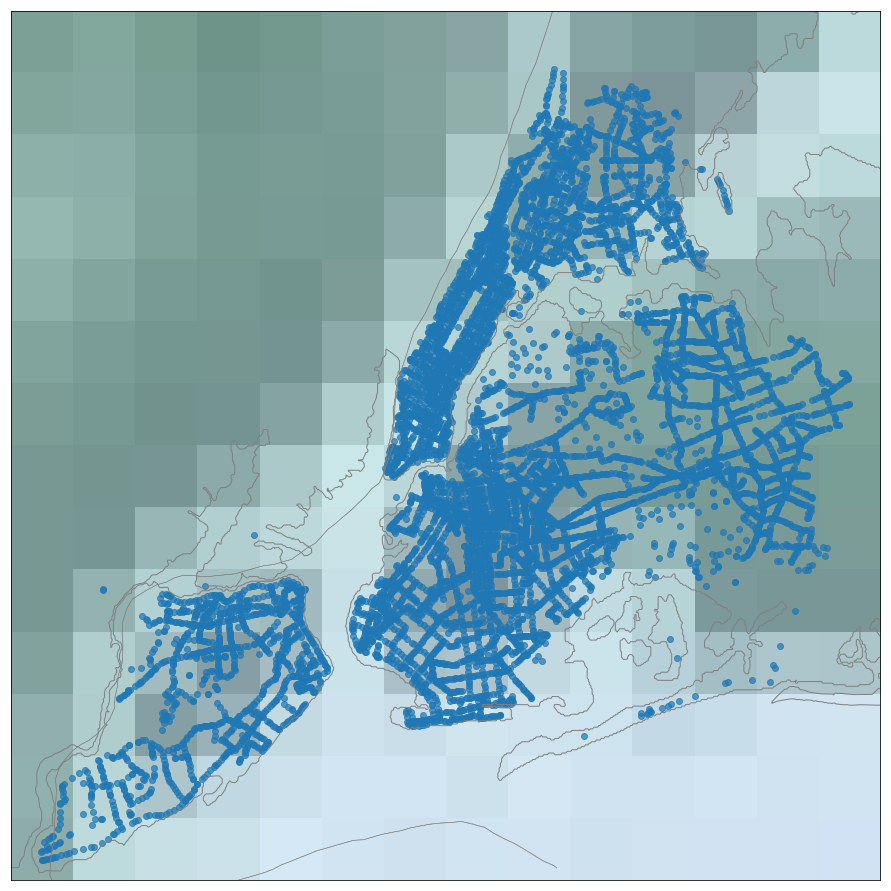

In [55]:
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=40.717768, lon_0=-73.9768765,
            width=5E4, height=5E4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# 2. scatter city data,
lat = bus_stops.vehicle_latitude.values
lon = bus_stops.vehicle_longitude.values
m.scatter(lon, lat, latlon=True, alpha=0.7)

In [43]:
mta1706.to_pickle("new-york-city-transport-statistics/mta1706.pkl")

In [44]:
mta1706_small = mta1706[['VehicleRef', 'RecordedAtTime', 'vehicle_latitude',
       'vehicle_longitude', 'PublishedLineName']]
mta1706_small.to_pickle("new-york-city-transport-statistics/mta1706_small.pkl")

In [56]:
bus_stops.to_pickle("new-york-city-transport-statistics/bus_stops.pkl")